In [8]:
import skimage
import matplotlib.pyplot as plt

left_img, right_img, groundtruth_disp = skimage.data.stereo_motorcycle()
left_img, right_img = map(skimage.color.rgb2gray, (left_img, right_img))


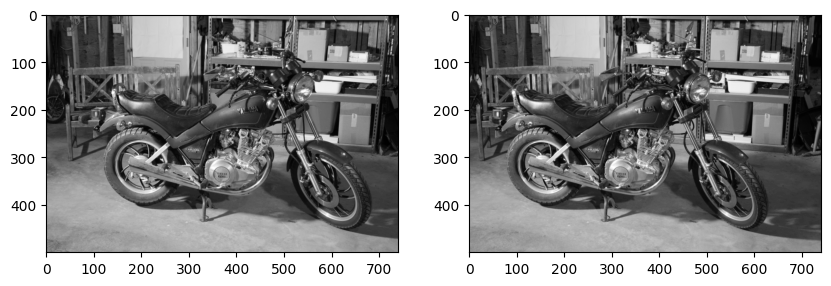

In [53]:
fix, ax = plt.subplots(1,2, figsize=(10,14))
ax = ax.flatten()

ax[0].imshow(left_img, cmap=plt.get_cmap('gray'))
ax[1].imshow(right_img, cmap=plt.get_cmap('gray'))

In [54]:
descriptor_extractor = skimage.feature.ORB()
descriptor_extractor.detect_and_extract(left_img)
left_image_keypoints = descriptor_extractor.keypoints

descriptor_extractor.detect_and_extract(right_img)
right_image_keypoints = descriptor_extractor.keypoints

matches = skimage.feature.match_descriptors(left_image_keypoints, right_image_keypoints)
print('num matches', matches.shape[0])

num matches 83


In [55]:
print('shape', left_image_keypoints.shape)
left_image_keypoints[0:10]

shape (500, 2)


array([[315. , 292. ],
       [251. , 404. ],
       [162. , 437. ],
       [155. , 476. ],
       [242. , 408. ],
       [315.6, 291.6],
       [144. , 425. ],
       [286. , 232. ],
       [252. , 404.4],
       [285.6, 231.6]])

In [56]:
matches.shape

(83, 2)

In [57]:
model, inliers = skimage.measure.ransac((
    left_image_keypoints[matches[:,0]],
    right_image_keypoints[matches[:,1]]
  ),
  skimage.transform.FundamentalMatrixTransform,
  min_samples=8,
  residual_threshold=1,
  max_trials=5000
)

In [58]:
model.shape

AttributeError: 'FundamentalMatrixTransform' object has no attribute 'shape'

In [60]:
inliers.shape

(83,)

In [61]:
inliers[0:10]

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [62]:
left_inlier_keypoints = left_image_keypoints[matches[inliers, 0]]
right_inlier_keypoints = right_image_keypoints[matches[inliers, 1]]

In [63]:
import numpy as np
disp = left_inlier_keypoints[:,1] - right_inlier_keypoints[:,1]
disp_coords = np.round(left_inlier_keypoints).astype(np.int64)
disp_idxs = np.ravel_multi_index(disp_coords.T, groundtruth_disp.shape)
disp_error = np.abs(groundtruth_disp.ravel()[disp_idxs] - disp)
disp_error = disp_error[np.isfinite(disp_error)]


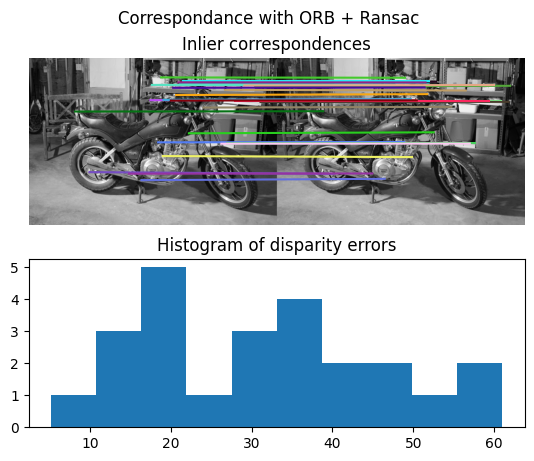

In [64]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plt.gray()

skimage.feature.plot_matches(
  ax[0], 
  left_img, 
  right_img, 
  left_image_keypoints, 
  right_image_keypoints,
  matches[inliers],
  only_matches=True
)

ax[0].axis("off")
ax[0].set_title("Inlier correspondences")

ax[1].hist(disp_error)
ax[1].set_title("Histogram of disparity errors")

fig.suptitle("Correspondance with ORB + Ransac")
plt.show()

Text(0.5, 1.0, 'Correspondance with ORB')

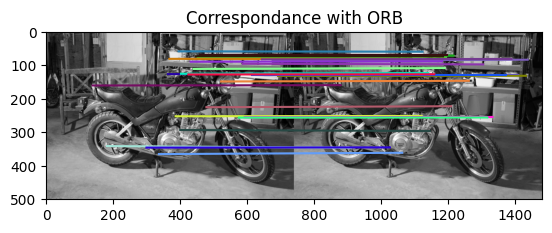

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.gray()

skimage.feature.plot_matches(
  ax, 
  left_img, 
  right_img, 
  left_image_keypoints, 
  right_image_keypoints,
  matches[inliers],
  only_matches=True
)
ax.set_title('Correspondance with ORB')

In [51]:
sift_descriptor_extractor = skimage.feature.SIFT()

descriptor_extractor.detect_and_extract(left_img)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(right_img)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches = skimage.feature.match_descriptors(descriptors1, descriptors2, max_ratio=0.6)


Text(0.5, 1.0, 'Correspondance with SIFT')

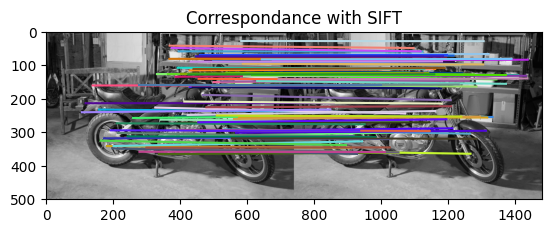

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.gray()

skimage.feature.plot_matches(
  ax,
  left_img,
  right_img,
  left_image_keypoints,
  right_image_keypoints,
  matches,
  only_matches=True
)
ax.set_title("Correspondance with SIFT")